<a href="https://colab.research.google.com/github/Piroon1123/choikeonwoo/blob/main/AI_06_%EC%B5%9C%EA%B1%B4%EC%9A%B0_CP2_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# #드라이브에 접근할 수 있도록 아래 코드 입력 => 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cd gdrive/data; ls-al;

**[파일불러오기]**

In [ ]:
# #불러올 파일의 경로를 filename 변수에 저장
# filename1 = '/content/drive/My Drive/Colab Notebooks/유저데이터 샘플리스트 셔플(AIB전달용).xlsx'

In [ ]:
import pandas as pd

#err 데이터 불러오기
# user = pd.read_excel(filename1)
user = pd.read_excel('/content/유저데이터 샘플리스트 셔플(AIB전달용).xlsx')
user.head()

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support
0,11726,M,19000101,충북/청주시,충북/청주시,기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21745,M,19000122,경기/고양시,경기/고양시,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원"
2,13327,M,19050101,경남/양산시,경남/양산시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23542,M,19190101,경기/여주시,경기/여주시,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,..."
4,14442,M,19200128,대전/유성구,대전/유성구,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,NaN,no,no,교육지원(만8~19세)


In [ ]:
user.shape 

(20010, 18)

In [ ]:
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 27.3 MB/s 
     |████████████████████████████████| 596 kB 53.2 MB/s 
     |████████████████████████████████| 3.1 MB 39.5 MB/s 
     |████████████████████████████████| 303 kB 42.8 MB/s 
     |████████████████████████████████| 10.1 MB 35.7 MB/s 
     |████████████████████████████████| 62 kB 758 kB/s 
     |████████████████████████████████| 102 kB 10.2 MB/s 
     |████████████████████████████████| 675 kB 56.7 MB/s 
     |████████████████████████████████| 812 kB 63.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=50c642f5b81c41027f9a60bc66907bc951cdbf36ccc6c8a0953f652a66457f7f
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=8c924b10a78b44b53eb731245ba671db41d75e53bc695d595961ddc04f602d63


In [ ]:
import pandas_profiling 

**[프로파일링-대략적인 데이터 파악]**

In [ ]:
profile = user.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**[EDA 1 - 결측치 전처리]**

**ⓐ gray user 별도 처리: study~support 까지 개인특징이 없는 user는 우선 삭제 **

**ⓑ 결측치 대상 columns : study, job, house_owner, marrige, mb_7, mb_8, mb_9, mb_10, mb_11 , income, illness ,mil_award, support**

In [ ]:
user[user['num']==11726] # gray user 예시

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support
0,11726,M,19000101,충북/청주시,충북/청주시,기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def isNaN(num):
  return num != num

In [ ]:
#gray user 별도 추출

gray_user=[]

for i in user.num:
  if (isNaN(user[user['num']==i].study).bool()) : #기타 자체에는 저학력자라는 저의가 있음
    if (isNaN(user[user['num']==i].job).bool()) : #기타 자체에 High Cardinality가 예상되기에 gray user로 분류하기엔 부적절한 것으로 판단
      if (isNaN(user[user['num']==i].house_owner).bool()):
        if (isNaN(user[user['num']==i].marrige).bool()):
          if (isNaN(user[user['num']==i].mb_7).bool()):#자동으로 mb 8,9에 대한 신뢰도 없어짐
            if  (isNaN(user[user['num']==i].mb_10).bool()) | ((user[user['num']==i].mb_10=="해당없음").bool()):
              if  (isNaN(user[user['num']==i].mb_11).bool()) | ((user[user['num']==i].mb_11=="해당없음").bool()):
                if  (isNaN(user[user['num']==i].income).bool()):
                  if (isNaN(user[user['num']==i].illness).bool()) | ((user[user['num']==i].illness=="no").bool()):
                    if (isNaN(user[user['num']==i].mil_award).bool()) | ((user[user['num']==i].mil_award=="no").bool()):
                      if (isNaN(user[user['num']==i].support).bool()):
                        gray_user.append(i)

            
print('gray user는 총 ',len(gray_user),'명 입니다.')

gray user는 총  410 명 입니다.


In [ ]:
df_gray=user[user['num'].isin(gray_user)] 
df_gray

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support
2,13327,M,19050101,경남/양산시,경남/양산시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,4953,M,19471123,경기/연천군,경기/구리시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,4960,M,19551213,경기/용인시,경기/용인시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,20506,M,19600910,대구/달서구,대구/달서구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,4427,M,19700415,서울/마포구,서울/마포구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,21563,M,20070516,대전/유성구,대전/유성구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19963,24619,M,20070605,충남/천안시,충남/천안시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19991,22529,M,20070820,경기/김포시,경기/김포시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,17216,M,20070828,경남/거제시,경남/거제시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
a_user=user.drop(df_gray.index) #gray user 삭제

In [ ]:
a_user.shape #a_user로 데이터프레임 변경

(19600, 18)

In [ ]:
# study 결측치 전처리
print('[value 카운트]')
print(a_user.study.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.study.isnull().sum(),'//// 결측치 비중', round((a_user.study.isnull().sum()/	20010)*100,2))

[value 카운트]
고등학교 졸업     6526
기타          5455
대학(원) 졸업    3606
대학(원) 재학    2932
대학(원) 휴학    1005
Name: study, dtype: int64
----------------------------------
결측치 개수 76 //// 결측치 비중 0.38


In [ ]:
# study 결측치는 예민변수이므로 '기타'로 대체  
a_user.study=a_user.study.fillna('기타')

In [ ]:
# job 결측치 전처리   
print('[value 카운트]')
print(a_user.job.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.job.isnull().sum(),'//// 결측치 비중', round((a_user.job.isnull().sum()/	20010)*100,2))

[value 카운트]
기타                                6021
근로자                               4133
대학(원)생                            3008
구직자                               2569
프리랜서                               541
                                  ... 
구직자,기업인/소상공인,기타                      1
구직자,근로자,예비창업자,기업인/소상공인,기타            1
대학(원)생,구직자,예비창업자,프리랜서,기타             1
대학(원)생,근로자,예비창업자,프리랜서,기업인/소상공인       1
대학(원)생,구직자,근로자,예비창업자,기타              1
Name: job, Length: 98, dtype: int64
----------------------------------
결측치 개수 633 //// 결측치 비중 3.16


In [ ]:
# job 결측치는 최빈값 '기타'로 대체  
a_user.job=a_user.job.fillna('기타')

In [ ]:
# house_owner 결측치 전처리   
print('[value 카운트]')
print(a_user.house_owner.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.house_owner.isnull().sum(),'//// 결측치 비중', round((a_user.house_owner.isnull().sum()/	20010)*100,2))

[value 카운트]
세대원    13692
세대주     4805
Name: house_owner, dtype: int64
----------------------------------
결측치 개수 1103 //// 결측치 비중 5.51


In [ ]:
# house_owner 결측치는 최빈값 '세대원'로 대체  
a_user.house_owner=a_user.house_owner.fillna('세대원')

In [ ]:
# marrige 결측치 전처리   
print('[value 카운트]')
print(a_user.marrige.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.marrige.isnull().sum(),'//// 결측치 비중', round((a_user.marrige.isnull().sum()/	20010)*100,2))

[value 카운트]
미혼    17099
기혼     1351
Name: marrige, dtype: int64
----------------------------------
결측치 개수 1150 //// 결측치 비중 5.75


In [ ]:
# marrige 결측치는 최빈값 '미혼'로 대체  
a_user.marrige=a_user.marrige.fillna('미혼')

In [ ]:
# mb_7 결측치 전처리    
print('[value 카운트]')
print(a_user.mb_7.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.mb_7.isnull().sum(),'//// 결측치 비중', round((a_user.mb_7.isnull().sum()/	20010)*100,2))

[value 카운트]
없다    17198
있다     1114
Name: mb_7, dtype: int64
----------------------------------
결측치 개수 1288 //// 결측치 비중 6.44


In [ ]:
# mb_7 없다로 체크한 것 중 mb_8에 자녀 명수가 기록될 시 있다로 변경

error_a=[]
for _ in a_user['num']:
  if (a_user[a_user['num']==_].mb_7=='없다').bool() & ((a_user[a_user['num']==_].mb_8=='1명')|(a_user[a_user['num']==_].mb_8=='2명')|(a_user[a_user['num']==_].mb_8=='3명 이상')).bool():
    error_a.append(_)

len(error_a) #해당 케이스 기입오류 0명

0

In [ ]:
# mb_7 있다로 체크한 것 중 mb_8에 자녀 명수가 기록 없을 시 없다로 변경
error_b=[]
for _ in a_user['num']:
  if (a_user[a_user['num']==_].mb_7=='있다').bool() & (a_user[a_user['num']==_].mb_8=='no').bool():
    error_b.append(_)

len(error_b) #해당 케이스 기입오류 0명

0

In [ ]:
# mb_7결측치 중 mb_8에 자녀 명수가 기록될 시 있다로 / 기록 없을시 없다로 변경
error_c=[]
for _ in a_user['num']:
  if (isNaN(a_user[a_user['num']==_].mb_7).bool()) & ((a_user[a_user['num']==_].mb_8=='1명')|(a_user[a_user['num']==_].mb_8=='2명')|(a_user[a_user['num']==_].mb_8=='3명 이상')).bool():
    error_c.append(_)

len(error_c) #해당 케이스 기입오류 0명

0

In [ ]:
# 따라서, 결측치는 모두 '없다'로 대체  
a_user.mb_7=a_user.mb_7.fillna('없다')

In [ ]:
# mb_8 결측치 전처리    
print('[value 카운트]')
print(a_user.mb_8.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.mb_8.isnull().sum(),'//// 결측치 비중', round((a_user.mb_8.isnull().sum()/	20010)*100,2))

[value 카운트]
no       17198
1명         537
2명         432
3명 이상      139
Name: mb_8, dtype: int64
----------------------------------
결측치 개수 1294 //// 결측치 비중 6.47


In [ ]:
# mb_8결측치 중 mb_7에 자녀가 있다로 기록 있을시 1명으로 변경(최빈값)
error_d=[]
for _ in a_user['num']:
  if (isNaN(a_user[a_user['num']==_].mb_8).bool()) & (a_user[a_user['num']==_].mb_7=='있다').bool():
    error_d.append(_)

len(error_d) #해당 케이스 기입오류 6명

6

In [ ]:
a_user[a_user['num'].isin(error_d)]

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support
164,7775,F,19710505,울산/남구,울산/울주군,대학(원) 졸업,기타,세대원,미혼,있다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9082,12111,F,19990729,전북/전주시,전북/전주시,고등학교 졸업,프리랜서,세대원,기혼,있다,NaN,영아,NaN,해당없음,기초생활수급자,no,no,"보육지원(만0~7세),개인금융지원"
11215,4665,F,20010117,경기/남양주시,경기/남양주시,대학(원) 재학,"대학(원)생,구직자",세대원,미혼,있다,NaN,NaN,"장애인,보훈대상 및 가족","결혼 예정,구직 예정",중위소득 40~60% 사이,no,no,"의료 지원,교육지원(만8~19세),개인금융지원,취업 지원,근로자 지원,문화생활 지원..."
13874,25021,M,20021205,경기/파주시,경기/파주시,대학(원) 재학,대학(원)생,세대원,미혼,있다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15323,26254,M,20030529,경남/거제시,경남/거제시,고등학교 졸업,대학(원)생,세대주,미혼,있다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16555,10425,F,20031012,서울/도봉구,서울/도봉구,기타,기타,세대원,미혼,있다,NaN,고등학생,한부모/조손 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세)


In [ ]:
for _ in a_user[a_user['num'].isin(error_d)].num:
  a_user.loc[(a_user['num']==_),'mb_8']='1명'

# a_user.loc[(a_user['num']==7775),'mb_8']=1
# a_user.loc[(a_user['num']==12111),'mb_8']=1
# a_user.loc[(a_user['num']==4665),'mb_8']=1
# a_user.loc[(a_user['num']==25021),'mb_8']=1
# a_user.loc[(a_user['num']==26254	),'mb_8']=1
# a_user.loc[(a_user['num']==10425),'mb_8']=1

In [ ]:
a_user[a_user['num'].isin(error_d)] #변경 내용 확인

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support
164,7775,F,19710505,울산/남구,울산/울주군,대학(원) 졸업,기타,세대원,미혼,있다,1명,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9082,12111,F,19990729,전북/전주시,전북/전주시,고등학교 졸업,프리랜서,세대원,기혼,있다,1명,영아,NaN,해당없음,기초생활수급자,no,no,"보육지원(만0~7세),개인금융지원"
11215,4665,F,20010117,경기/남양주시,경기/남양주시,대학(원) 재학,"대학(원)생,구직자",세대원,미혼,있다,1명,NaN,"장애인,보훈대상 및 가족","결혼 예정,구직 예정",중위소득 40~60% 사이,no,no,"의료 지원,교육지원(만8~19세),개인금융지원,취업 지원,근로자 지원,문화생활 지원..."
13874,25021,M,20021205,경기/파주시,경기/파주시,대학(원) 재학,대학(원)생,세대원,미혼,있다,1명,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15323,26254,M,20030529,경남/거제시,경남/거제시,고등학교 졸업,대학(원)생,세대주,미혼,있다,1명,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16555,10425,F,20031012,서울/도봉구,서울/도봉구,기타,기타,세대원,미혼,있다,1명,고등학생,한부모/조손 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세)


In [ ]:
# 그 외 mb_8 결측치는 모두 'no'로 대체  
a_user.mb_8=a_user.mb_8.fillna('no')

In [ ]:
# mb_9 결측치 전처리   
print('[value 카운트]')
print(a_user.mb_9.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.mb_9.isnull().sum(),'//// 결측치 비중', round((a_user.mb_9.isnull().sum()/	20010)*100,2))

[value 카운트]
no                  17198
영아                    355
유아                    138
초등학생                  122
성인                    117
영아,유아                  85
유아,초등학생                79
고등학생,성인                30
초등학생,중학생               29
중학생                    25
고등학생                   24
중학생,고등학생               23
영아,초등학생                22
영아,유아,초등학생             12
초등학생,고등학생              12
초등학생,중학생,고등학생           8
초등학생,성인                 5
유아,초등학생,중학생             3
중학생,성인                  3
영아,초등학생,중학생             2
중학생,고등학생,성인             2
유아,중학생                  2
유아,고등학생                 1
유아,고등학생,성인              1
영아,고등학생                 1
영아,중학생                  1
유아,초등학생,중학생,고등학생        1
초등학생,중학생,성인             1
Name: mb_9, dtype: int64
----------------------------------
결측치 개수 1298 //// 결측치 비중 6.49


In [ ]:
# mb_9결측치 중 mb_7에 자녀가 있다로 기록 있을시 '영아'로 변경(최빈값)
error_e=[]
for _ in a_user['num']:
  if (isNaN(a_user[a_user['num']==_].mb_9).bool()) & (a_user[a_user['num']==_].mb_7=='있다').bool():
    error_e.append(_)

len(error_e) #해당 케이스 기입오류 6명

10

In [ ]:
a_user[a_user['num'].isin(error_e)]

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support
164,7775,F,19710505,울산/남구,울산/울주군,대학(원) 졸업,기타,세대원,미혼,있다,1명,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,23981,F,19861125,전북/군산시,전북/군산시,기타,"프리랜서,기업인/소상공인,기타",세대원,기혼,있다,3명 이상,NaN,다자녀 가정,NaN,NaN,no,no,NaN
5748,4713,F,19960930,서울/마포구,서울/마포구,대학(원) 재학,기업인/소상공인,세대주,기혼,있다,3명 이상,NaN,해당없음,구직 예정,중위소득 100% 이상,no,no,"보육지원(만0~7세),개인금융지원,근로자 지원,주택-부동산 지원"
6729,13949,M,19970820,부산/수영구,부산/수영구,고등학교 졸업,프리랜서,세대주,미혼,있다,1명,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7192,22677,M,19980116,강원/삼척시,강원/삼척시,기타,기타,세대원,미혼,있다,1명,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11129,11059,M,20001223,울산/중구,울산/남구,고등학교 졸업,구직자,세대원,미혼,있다,1명,NaN,NaN,"출생 예정,구직 예정",중위소득 40% 이하,no,no,"보육지원(만0~7세),개인금융지원,창업 지원,취업 지원,근로자 지원"
11215,4665,F,20010117,경기/남양주시,경기/남양주시,대학(원) 재학,"대학(원)생,구직자",세대원,미혼,있다,1명,NaN,"장애인,보훈대상 및 가족","결혼 예정,구직 예정",중위소득 40~60% 사이,no,no,"의료 지원,교육지원(만8~19세),개인금융지원,취업 지원,근로자 지원,문화생활 지원..."
13874,25021,M,20021205,경기/파주시,경기/파주시,대학(원) 재학,대학(원)생,세대원,미혼,있다,1명,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14862,17167,F,20030407,전북/군산시,전북/군산시,고등학교 졸업,"근로자,기타",세대주,기혼,있다,3명 이상,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15323,26254,M,20030529,경남/거제시,경남/거제시,고등학교 졸업,대학(원)생,세대주,미혼,있다,1명,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for _ in a_user[a_user['num'].isin(error_e)].num:
  a_user.loc[(a_user['num']==_),'mb_9']='영아'

In [ ]:
a_user[a_user['num'].isin(error_e)]

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support
164,7775,F,19710505,울산/남구,울산/울주군,대학(원) 졸업,기타,세대원,미혼,있다,1명,영아,NaN,NaN,NaN,NaN,NaN,NaN
1305,23981,F,19861125,전북/군산시,전북/군산시,기타,"프리랜서,기업인/소상공인,기타",세대원,기혼,있다,3명 이상,영아,다자녀 가정,NaN,NaN,no,no,NaN
5748,4713,F,19960930,서울/마포구,서울/마포구,대학(원) 재학,기업인/소상공인,세대주,기혼,있다,3명 이상,영아,해당없음,구직 예정,중위소득 100% 이상,no,no,"보육지원(만0~7세),개인금융지원,근로자 지원,주택-부동산 지원"
6729,13949,M,19970820,부산/수영구,부산/수영구,고등학교 졸업,프리랜서,세대주,미혼,있다,1명,영아,NaN,NaN,NaN,NaN,NaN,NaN
7192,22677,M,19980116,강원/삼척시,강원/삼척시,기타,기타,세대원,미혼,있다,1명,영아,NaN,NaN,NaN,NaN,NaN,NaN
11129,11059,M,20001223,울산/중구,울산/남구,고등학교 졸업,구직자,세대원,미혼,있다,1명,영아,NaN,"출생 예정,구직 예정",중위소득 40% 이하,no,no,"보육지원(만0~7세),개인금융지원,창업 지원,취업 지원,근로자 지원"
11215,4665,F,20010117,경기/남양주시,경기/남양주시,대학(원) 재학,"대학(원)생,구직자",세대원,미혼,있다,1명,영아,"장애인,보훈대상 및 가족","결혼 예정,구직 예정",중위소득 40~60% 사이,no,no,"의료 지원,교육지원(만8~19세),개인금융지원,취업 지원,근로자 지원,문화생활 지원..."
13874,25021,M,20021205,경기/파주시,경기/파주시,대학(원) 재학,대학(원)생,세대원,미혼,있다,1명,영아,NaN,NaN,NaN,NaN,NaN,NaN
14862,17167,F,20030407,전북/군산시,전북/군산시,고등학교 졸업,"근로자,기타",세대주,기혼,있다,3명 이상,영아,NaN,NaN,NaN,NaN,NaN,NaN
15323,26254,M,20030529,경남/거제시,경남/거제시,고등학교 졸업,대학(원)생,세대주,미혼,있다,1명,영아,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 그 외 mb_9 결측치는 'no' 로 대체  
a_user.mb_9=a_user.mb_9.fillna('no')

In [ ]:
# mb_10 결측치 전처리     
print('[value 카운트]')
print(a_user.mb_10.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.mb_10.isnull().sum(),'//// 결측치 비중', round((a_user.mb_10.isnull().sum()/	20010)*100,2))

[value 카운트]
해당없음                      11689
저소득층                       1480
한부모/조손 가정                  1304
다자녀 가정                     1231
저소득층,한부모/조손 가정              620
                          ...  
환자,북한이탈주민                     1
저소득층,장애인,환자,한부모/조손 가정         1
저소득층,독거노인,보훈대상 및 가족           1
저소득층,환자,소년소녀가장                1
농축수산인,한부모/조손 가정,다자녀 가정        1
Name: mb_10, Length: 101, dtype: int64
----------------------------------
결측치 개수 1978 //// 결측치 비중 9.89


In [ ]:
#  mb_10 결측치는 예민 데이터로 '해당없음'으로 대체  
a_user.mb_10=a_user.mb_10.fillna('해당없음')

In [ ]:
# mb_11 결측치 전처리    
print('[value 카운트]')
print(a_user.mb_11.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.mb_11.isnull().sum(),'//// 결측치 비중', round((a_user.mb_11.isnull().sum()/	20010)*100,2))

[value 카운트]
해당없음                                         11527
구직 예정                                         2796
입대 예정                                         1353
제대 예정                                          419
결혼 예정                                          398
결혼 예정,구직 예정                                    126
입대 예정,구직 예정                                     97
출생 예정                                           83
임신 예정                                           83
은퇴 예정                                           53
제대 예정,구직 예정                                     50
결혼 예정,임신 예정                                     41
결혼 예정,임신 예정,구직 예정                               29
결혼 예정,출생 예정                                     20
구직 예정,은퇴 예정                                     19
입대 예정,결혼 예정                                     13
임신 예정,구직 예정                                     13
임신 예정,출생 예정                                     11
결혼 예정,임신 예정,출생 예정,구직 예정                         10
결혼 예정,구직 예정,은퇴 예정  

In [ ]:
#  mb_11 결측치는 예민 데이터로 '해당없음'으로 대체  
a_user.mb_11=a_user.mb_11.fillna('해당없음')

In [ ]:
# income결측치 전처리   => job, study , house_owner와 관련이 있으나 영향도가 적은 상황
print('[value 카운트]')
print(a_user.income.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.income.isnull().sum(),'//// 결측치 비중', round((a_user.income.isnull().sum()/	20010)*100,2))

[value 카운트]
중위소득 40% 이하        3899
중위소득 40~60% 사이     3594
중위소득 60~80% 사이     2173
중위소득 100% 이상       1840
기초생활수급자            1803
중위소득 80~100% 사이    1518
Name: income, dtype: int64
----------------------------------
결측치 개수 4773 //// 결측치 비중 23.85


In [ ]:
#  income 결측치는 중위값(중위소득 40~60% 사이)으로 대체 : job,study,house_owner와 income 라벨링으로 머신러닝 돌려도 되나 이럴 경우 향후 정보의 누수가 발생될 것으로 예상됨
#  black out 되는 경우보단, 작위적으로 결측치를 설정하는 것이 향후 catch-up 시에도 원활할 것으로 판단됨

a_user.income=a_user.income.fillna('중위소득 40~60% 사이')

In [ ]:
# illness결측치 전처리     
print('[value 카운트]')
print(a_user.illness.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.illness.isnull().sum(),'//// 결측치 비중', round((a_user.illness.isnull().sum()/	20010)*100,2))

[value 카운트]
no                  17824
한부모/조손 가정              69
지체                     45
뇌병변                    25
청각                     21
정신                     16
시각                     15
해당없음                   12
언어                      9
자폐성                     6
지체,정신                   6
청각,언어                   5
신장                      4
한부모/조손 가정,자폐성           3
한부모/조손 가정,뇌병변           2
청각,호흡기                  2
장루                      2
지체,뇌병변                  2
지체,언어                   2
청각,한부모/조손 가정            2
간                       2
한부모/조손 가정,정신            2
언어,해당없음                 1
언어,자폐성,심장               1
간질                      1
정신,해당없음                 1
지체,한부모/조손 가정,뇌병변        1
심장                      1
청각,자폐성,간                1
지체,해당없음                 1
지체,청각                   1
지체,간질                   1
시각,해당없음                 1
지체,한부모/조손 가정            1
언어,한부모/조손 가정            1
지체,청각,자폐성               1
청각,뇌병변                  1
자폐성,정신                  1


In [ ]:
#  illness 결측치는 최빈값  'no'으로 대체  
a_user.illness=a_user.illness.fillna('no')

In [ ]:
# mil_award결측치 전처리      
print('[value 카운트]')
print(a_user.mil_award.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.mil_award.isnull().sum(),'//// 결측치 비중', round((a_user.mil_award.isnull().sum()/	20010)*100,2))

[value 카운트]
no                                                              17985
국가유공자                                                              52
해당없음                                                               21
보훈보상대상자                                                            19
국가유공자,보훈보상대상자                                                       4
참전유공자                                                               4
특수임무유공자                                                             2
고엽제 후유(의)증                                                          2
참전유공자,보훈보상대상자                                                       1
국가유공자,제대군인,보훈보상대상자                                                  1
국가유공자,참전유공자                                                         1
국가유공자,참전유공자,고엽제 후유(의)증,독립유공자,제대군인,5.18 민주유공자,보훈보상대상자,특수임무유공자        1
국가유공자,제대군인                                                          1
국가유공자,참전유공자,보훈보상대상자                                                 1
5.18 민주유

In [ ]:
# mil_award 결측치는 최빈값  'no'으로 대체  
a_user.mil_award=a_user.mil_award.fillna('no')

In [ ]:
# support결측치 전처리       
print('[value 카운트]')
print(a_user.support.value_counts())
print('----------------------------------')
print('결측치 개수',a_user.support.isnull().sum(),'//// 결측치 비중', round((a_user.support.isnull().sum()/	20010)*100,2))

[value 카운트]
교육지원(만8~19세)                                                                          2535
취업 지원                                                                                  807
근로자 지원                                                                                 755
개인금융지원                                                                                 468
의료 지원,성인교육지원,개인금융지원,기업금융지원,창업 지원,취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원                        293
                                                                                      ... 
의료 지원,성인교육지원,기업금융지원,근로자 지원,주택-부동산 지원                                                     1
보육지원(만0~7세),창업 지원,취업 지원,근로자 지원,주택-부동산 지원                                                 1
교육지원(만8~19세),성인교육지원,창업 지원,취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원                                 1
교육지원(만8~19세),개인금융지원,기업금융지원,근로자 지원,주택-부동산 지원                                              1
의료 지원,보육지원(만0~7세),교육지원(만8~19세),성인교육지원,개인금융지원,기업금융지원,창업 지원,근로자 지원,문화생활 지원,주택-부동

In [ ]:
max=1
for _ in a_user.support.value_counts().index:
  if len(_) > max:
    max=len(_)
    max_index=_
max_index # 최대한 많은 정보를 주고자 함 (support에서 결측치는 예민 데이터라기보단 무엇을 선택할지 모르는 것으로 판단됨. 이에 정보 노출 관점으로 EDA???

#-> 웰로의 서비스 취지와 부합하지 않음

'의료 지원,보육지원(만0~7세),교육지원(만8~19세),성인교육지원,개인금융지원,기업금융지원,창업 지원,취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원'

In [ ]:
# support 결측치는 신규정보인 '해당없음'으로 대체  
a_user.support=a_user.support.fillna('기타') #건우님 회의 f/b : '기타'로 언어 순화

In [ ]:
a_user

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support
0,11726,M,19000101,충북/청주시,충북/청주시,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타
1,21745,M,19000122,경기/고양시,경기/고양시,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원"
3,23542,M,19190101,경기/여주시,경기/여주시,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,..."
4,14442,M,19200128,대전/유성구,대전/유성구,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세)
5,10640,M,19210101,제주/제주시,제주/제주시,기타,기타,세대원,미혼,없다,no,no,다자녀 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20004,24245,M,20070920,경북/상주시,경북/상주시,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세)
20005,25100,F,20070927,경남/함양군,경남/함양군,기타,기타,세대원,미혼,없다,no,no,"저소득층,한부모/조손 가정,다문화 가정",해당없음,기초생활수급자,no,no,교육지원(만8~19세)
20006,16309,M,20070928,울산/중구,울산/중구,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타
20007,24720,F,20071015,대전/유성구,대전/유성구,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,교육지원(만8~19세)


**EDA 2 - 결측치 전처리로 인한 변화 확인 = 데이터 저항성의 강조**

In [ ]:
# profile2 = a_user.profile_report()
# profile2

ⓐ income,과 support를 제외하곤 value 분산에 변화가 거의 없음

ⓑ 결측치 Zero화

ⓒ Income의 경우 약 25%수준이었던 결측치를 중위값(어떤 주어진 값들을 크기의 순서대로 정렬했을 때 가장 중앙에 위치하는 값)으로 대체 하다보니 unbalanced가 작위적으로 이루어 졌음

ⓓ support의 경우 웰로 서비스[★ 매칭] 본질에 충실하기 위해 '기타'으로 결측치 대체


**[EDA3-유저데이터 특성공학 => 자료변수의 재표현]**

step1 : 변수 생성 필요 영역




In [ ]:
# 만 나이 int화 / 1. 생일이 지났음 : 만 나이 = (연 나이 -1살)  _____________________2.생일이 지나지 않았음 : (만 나이 = 연 나이 -2살)

In [ ]:
import datetime as dt
x = dt.datetime.now()
x.year, x.month, x.day

(2021, 12, 30)

In [ ]:
import datetime as datetime

a_user.birth = pd.to_datetime(a_user.birth.astype('str')) #str -> date화
a_user.birth

0       1900-01-01
1       1900-01-22
3       1919-01-01
4       1920-01-28
5       1921-01-01
           ...    
20004   2007-09-20
20005   2007-09-27
20006   2007-09-28
20007   2007-10-15
20008   2007-10-15
Name: birth, Length: 19600, dtype: datetime64[ns]

In [ ]:
age=[]
for i in a_user.birth:
  if i.month - x.month > 0:
    age.append((x.year-i.year+1)-1)
  elif ((i.month-x.month) == 0) & ((i.day-x.day) > 0):
    age.append((x.year-i.year+1)-1)
  else:
    age.append((x.year-i.year+1)-2)

age

[120,
 120,
 101,
 100,
 99,
 99,
 98,
 80,
 79,
 78,
 75,
 72,
 72,
 71,
 71,
 70,
 70,
 70,
 69,
 68,
 67,
 67,
 66,
 66,
 66,
 66,
 66,
 65,
 65,
 65,
 64,
 64,
 64,
 64,
 63,
 63,
 62,
 62,
 62,
 62,
 61,
 61,
 61,
 61,
 61,
 60,
 60,
 60,
 60,
 59,
 59,
 59,
 59,
 59,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 47,
 

In [ ]:
a_user['age']=age
a_user

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support,age
0,11726,M,1900-01-01,충북/청주시,충북/청주시,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,120
1,21745,M,1900-01-22,경기/고양시,경기/고양시,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120
3,23542,M,1919-01-01,경기/여주시,경기/여주시,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,...",101
4,14442,M,1920-01-28,대전/유성구,대전/유성구,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),100
5,10640,M,1921-01-01,제주/제주시,제주/제주시,기타,기타,세대원,미혼,없다,no,no,다자녀 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20004,24245,M,2007-09-20,경북/상주시,경북/상주시,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),13
20005,25100,F,2007-09-27,경남/함양군,경남/함양군,기타,기타,세대원,미혼,없다,no,no,"저소득층,한부모/조손 가정,다문화 가정",해당없음,기초생활수급자,no,no,교육지원(만8~19세),13
20006,16309,M,2007-09-28,울산/중구,울산/중구,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,13
20007,24720,F,2007-10-15,대전/유성구,대전/유성구,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,교육지원(만8~19세),13


In [ ]:
# home1 상위 / 하위 분리 split 활용
home1_list=a_user['home1'].str.split('/')
a_user['home1_t']=home1_list.str.get(0)
a_user['home1_b']=home1_list.str.get(1)

# home2 상위 / 하위 분리 split 활용
home2_list=a_user['home2'].str.split('/')
a_user['home2_t']=home2_list.str.get(0)
a_user['home2_b']=home2_list.str.get(1)
a_user

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support,age,home1_t,home1_b,home2_t,home2_b
0,11726,M,1900-01-01,충북/청주시,충북/청주시,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,120,충북,청주시,충북,청주시
1,21745,M,1900-01-22,경기/고양시,경기/고양시,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시
3,23542,M,1919-01-01,경기/여주시,경기/여주시,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,...",101,경기,여주시,경기,여주시
4,14442,M,1920-01-28,대전/유성구,대전/유성구,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),100,대전,유성구,대전,유성구
5,10640,M,1921-01-01,제주/제주시,제주/제주시,기타,기타,세대원,미혼,없다,no,no,다자녀 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),99,제주,제주시,제주,제주시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20004,24245,M,2007-09-20,경북/상주시,경북/상주시,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),13,경북,상주시,경북,상주시
20005,25100,F,2007-09-27,경남/함양군,경남/함양군,기타,기타,세대원,미혼,없다,no,no,"저소득층,한부모/조손 가정,다문화 가정",해당없음,기초생활수급자,no,no,교육지원(만8~19세),13,경남,함양군,경남,함양군
20006,16309,M,2007-09-28,울산/중구,울산/중구,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,13,울산,중구,울산,중구
20007,24720,F,2007-10-15,대전/유성구,대전/유성구,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,교육지원(만8~19세),13,대전,유성구,대전,유성구


In [ ]:
import numpy as np
#home1_b와 home2_b가 diff한 것 피쳐생성
a_user['home_diff_is']=np.where(a_user['home1_b']!=a_user['home2_b'],1,0)
a_user

,num,sex,birth,home1,home2,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support,age,home1_t,home1_b,home2_t,home2_b,home_diff_is
0,11726,M,1900-01-01,충북/청주시,충북/청주시,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,120,충북,청주시,충북,청주시,0
1,21745,M,1900-01-22,경기/고양시,경기/고양시,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시,0
3,23542,M,1919-01-01,경기/여주시,경기/여주시,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,...",101,경기,여주시,경기,여주시,0
4,14442,M,1920-01-28,대전/유성구,대전/유성구,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),100,대전,유성구,대전,유성구,0
5,10640,M,1921-01-01,제주/제주시,제주/제주시,기타,기타,세대원,미혼,없다,no,no,다자녀 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),99,제주,제주시,제주,제주시,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20004,24245,M,2007-09-20,경북/상주시,경북/상주시,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),13,경북,상주시,경북,상주시,0
20005,25100,F,2007-09-27,경남/함양군,경남/함양군,기타,기타,세대원,미혼,없다,no,no,"저소득층,한부모/조손 가정,다문화 가정",해당없음,기초생활수급자,no,no,교육지원(만8~19세),13,경남,함양군,경남,함양군,0
20006,16309,M,2007-09-28,울산/중구,울산/중구,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,13,울산,중구,울산,중구,0
20007,24720,F,2007-10-15,대전/유성구,대전/유성구,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,교육지원(만8~19세),13,대전,유성구,대전,유성구,0


In [ ]:
# drop 할 열 처리
a_user=a_user.drop(['birth','home1','home2'],axis=1)
a_user

,num,sex,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support,age,home1_t,home1_b,home2_t,home2_b,home_diff_is
0,11726,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,120,충북,청주시,충북,청주시,0
1,21745,M,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시,0
3,23542,M,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,...",101,경기,여주시,경기,여주시,0
4,14442,M,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),100,대전,유성구,대전,유성구,0
5,10640,M,기타,기타,세대원,미혼,없다,no,no,다자녀 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),99,제주,제주시,제주,제주시,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20004,24245,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),13,경북,상주시,경북,상주시,0
20005,25100,F,기타,기타,세대원,미혼,없다,no,no,"저소득층,한부모/조손 가정,다문화 가정",해당없음,기초생활수급자,no,no,교육지원(만8~19세),13,경남,함양군,경남,함양군,0
20006,16309,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,13,울산,중구,울산,중구,0
20007,24720,F,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,교육지원(만8~19세),13,대전,유성구,대전,유성구,0


In [ ]:

conditionlist = [
    (a_user['age'] < 20) ,
    (a_user['age'] >= 20) & (a_user['age'] <40),
    (a_user['age'] >= 40) & (a_user['age'] <60),
    (a_user['age'] >= 60) & (a_user['age'] <80),
    (a_user['age'] >= 80)]
age_c = ['20대이하','2030','4050','6070','80대이상']
a_user['age_cat'] = np.select(conditionlist, age_c , default='Not Specified')
a_user

,num,sex,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support,age,home1_t,home1_b,home2_t,home2_b,home_diff_is,age_cat
0,11726,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,120,충북,청주시,충북,청주시,0,80대이상
1,21745,M,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시,0,80대이상
3,23542,M,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,...",101,경기,여주시,경기,여주시,0,80대이상
4,14442,M,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),100,대전,유성구,대전,유성구,0,80대이상
5,10640,M,기타,기타,세대원,미혼,없다,no,no,다자녀 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),99,제주,제주시,제주,제주시,0,80대이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20004,24245,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),13,경북,상주시,경북,상주시,0,20대이하
20005,25100,F,기타,기타,세대원,미혼,없다,no,no,"저소득층,한부모/조손 가정,다문화 가정",해당없음,기초생활수급자,no,no,교육지원(만8~19세),13,경남,함양군,경남,함양군,0,20대이하
20006,16309,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,13,울산,중구,울산,중구,0,20대이하
20007,24720,F,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,교육지원(만8~19세),13,대전,유성구,대전,유성구,0,20대이하


step2 : 1cell _ 다중선택 값 처리 => 데이터 재구조화 UNSTACK 방법

In [ ]:
#job 
r_job = a_user['job'].str.split(',')
r_job

0            [기타]
1           [근로자]
3           [근로자]
4        [대학(원)생]
5            [기타]
           ...   
20004        [기타]
20005        [기타]
20006        [기타]
20007        [기타]
20008        [기타]
Name: job, Length: 19600, dtype: object

In [ ]:
r_job = r_job.apply(lambda x: pd.Series(x))
r_job

,0,1,2,3,4,5,6
0,기타,NaN,NaN,NaN,NaN,NaN,NaN
1,근로자,NaN,NaN,NaN,NaN,NaN,NaN
3,근로자,NaN,NaN,NaN,NaN,NaN,NaN
4,대학(원)생,NaN,NaN,NaN,NaN,NaN,NaN
5,기타,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
20004,기타,NaN,NaN,NaN,NaN,NaN,NaN
20005,기타,NaN,NaN,NaN,NaN,NaN,NaN
20006,기타,NaN,NaN,NaN,NaN,NaN,NaN
20007,기타,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
r_job.stack()

0      0        기타
1      0       근로자
3      0       근로자
4      0    대학(원)생
5      0        기타
             ...  
20004  0        기타
20005  0        기타
20006  0        기타
20007  0        기타
20008  0        기타
Length: 22581, dtype: object

In [ ]:
r_job.stack().reset_index(level=1, drop=True)

0            기타
1           근로자
3           근로자
4        대학(원)생
5            기타
          ...  
20004        기타
20005        기타
20006        기타
20007        기타
20008        기타
Length: 22581, dtype: object

In [ ]:
r_job = r_job.stack().reset_index(level=1, drop=True).to_frame('job_single')
r_job

,job_single
0,기타
1,근로자
3,근로자
4,대학(원)생
5,기타
...,...
20004,기타
20005,기타
20006,기타
20007,기타


In [ ]:
a_user_1 =  a_user.merge(r_job, left_index=True, right_index=True, how='left')
a_user_1

,num,sex,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support,age,home1_t,home1_b,home2_t,home2_b,home_diff_is,age_cat,job_single
0,11726,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,120,충북,청주시,충북,청주시,0,80대이상,기타
1,21745,M,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시,0,80대이상,근로자
3,23542,M,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,...",101,경기,여주시,경기,여주시,0,80대이상,근로자
4,14442,M,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),100,대전,유성구,대전,유성구,0,80대이상,대학(원)생
5,10640,M,기타,기타,세대원,미혼,없다,no,no,다자녀 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),99,제주,제주시,제주,제주시,0,80대이상,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20004,24245,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),13,경북,상주시,경북,상주시,0,20대이하,기타
20005,25100,F,기타,기타,세대원,미혼,없다,no,no,"저소득층,한부모/조손 가정,다문화 가정",해당없음,기초생활수급자,no,no,교육지원(만8~19세),13,경남,함양군,경남,함양군,0,20대이하,기타
20006,16309,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,13,울산,중구,울산,중구,0,20대이하,기타
20007,24720,F,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,교육지원(만8~19세),13,대전,유성구,대전,유성구,0,20대이하,기타


In [ ]:
# # mb_9 => 구ver. 영향력 데이터 2% 수준으로 실행x
# r_mb_9 = a_user_1['mb_9'].str.split(',')
# r_mb_9 = r_mb_9.apply(lambda x: pd.Series(x))
# r_mb_9.stack()
# r_mb_9.stack().reset_index(level=1, drop=True)
# r_mb_9 = r_mb_9.stack().reset_index(level=1, drop=True).to_frame('mb_9_single')
# a_user_2 =  a_user_1.merge(r_mb_9, left_index=True, right_index=True, how='left')
# a_user_2

In [ ]:
# mb_10 
r_mb_10 = a_user_1['mb_10'].str.split(',')
r_mb_10 = r_mb_10.apply(lambda x: pd.Series(x))
r_mb_10.stack()
r_mb_10.stack().reset_index(level=1, drop=True)
r_mb_10 = r_mb_10.stack().reset_index(level=1, drop=True).to_frame('mb_10_single')
a_user_2 =  a_user_1.merge(r_mb_10, left_index=True, right_index=True, how='left')
a_user_2


,num,sex,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support,age,home1_t,home1_b,home2_t,home2_b,home_diff_is,age_cat,job_single,mb_10_single
0,11726,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,120,충북,청주시,충북,청주시,0,80대이상,기타,해당없음
1,21745,M,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시,0,80대이상,근로자,해당없음
3,23542,M,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,...",101,경기,여주시,경기,여주시,0,80대이상,근로자,해당없음
4,14442,M,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),100,대전,유성구,대전,유성구,0,80대이상,대학(원)생,해당없음
5,10640,M,기타,기타,세대원,미혼,없다,no,no,다자녀 가정,해당없음,중위소득 40~60% 사이,no,no,교육지원(만8~19세),99,제주,제주시,제주,제주시,0,80대이상,기타,다자녀 가정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20005,25100,F,기타,기타,세대원,미혼,없다,no,no,"저소득층,한부모/조손 가정,다문화 가정",해당없음,기초생활수급자,no,no,교육지원(만8~19세),13,경남,함양군,경남,함양군,0,20대이하,기타,한부모/조손 가정
20005,25100,F,기타,기타,세대원,미혼,없다,no,no,"저소득층,한부모/조손 가정,다문화 가정",해당없음,기초생활수급자,no,no,교육지원(만8~19세),13,경남,함양군,경남,함양군,0,20대이하,기타,다문화 가정
20006,16309,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,13,울산,중구,울산,중구,0,20대이하,기타,해당없음
20007,24720,F,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,교육지원(만8~19세),13,대전,유성구,대전,유성구,0,20대이하,기타,해당없음


In [ ]:
# #mb_11 구ver => 미래형이지만 그 기한이 안 나옴 / 기혼 최빈값 나이 등 유추가능
# r_mb_11 = a_user_3['mb_11'].str.split(',')
# r_mb_11 = r_mb_11.apply(lambda x: pd.Series(x))
# r_mb_11.stack()
# r_mb_11.stack().reset_index(level=1, drop=True)
# r_mb_11 = r_mb_11.stack().reset_index(level=1, drop=True).to_frame('mb_11_single')
# a_user_4 =  a_user_3.merge(r_mb_11, left_index=True, right_index=True, how='left')
# a_user_4


In [ ]:
# #support 구ver
# r_support = a_user_4['support'].str.split(',')
# r_support  = r_support .apply(lambda x: pd.Series(x))
# r_support .stack()
# r_support .stack().reset_index(level=1, drop=True)
# r_support  = r_support .stack().reset_index(level=1, drop=True).to_frame('r_support _single')
# a_user_5 =  a_user_4.merge(r_support , left_index=True, right_index=True, how='left')
# a_user_5

In [ ]:
#support
r_support = a_user_2['support'].str.split(',')
r_support  = r_support .apply(lambda x: pd.Series(x))
r_support .stack()
r_support .stack().reset_index(level=1, drop=True)
r_support  = r_support .stack().reset_index(level=1, drop=True).to_frame('r_support _single')
a_user_3 =  a_user_2.merge(r_support , left_index=True, right_index=True, how='left')
a_user_3

,num,sex,study,job,house_owner,marrige,mb_7,mb_8,mb_9,mb_10,mb_11,income,illness,mil_award,support,age,home1_t,home1_b,home2_t,home2_b,home_diff_is,age_cat,job_single,mb_10_single,r_support _single
0,11726,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,120,충북,청주시,충북,청주시,0,80대이상,기타,해당없음,기타
1,21745,M,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시,0,80대이상,근로자,해당없음,취업 지원
1,21745,M,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시,0,80대이상,근로자,해당없음,근로자 지원
1,21745,M,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시,0,80대이상,근로자,해당없음,문화생활 지원
1,21745,M,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원",120,경기,고양시,경기,고양시,0,80대이상,근로자,해당없음,주택-부동산 지원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20006,16309,M,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40~60% 사이,no,no,기타,13,울산,중구,울산,중구,0,20대이하,기타,해당없음,기타
20007,24720,F,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 40% 이하,no,no,교육지원(만8~19세),13,대전,유성구,대전,유성구,0,20대이하,기타,해당없음,교육지원(만8~19세)
20008,27341,F,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 80~100% 사이,no,no,"교육지원(만8~19세),개인금융지원,문화생활 지원",13,세종,세종시 전체,세종,세종시 전체,0,20대이하,기타,해당없음,교육지원(만8~19세)
20008,27341,F,기타,기타,세대원,미혼,없다,no,no,해당없음,해당없음,중위소득 80~100% 사이,no,no,"교육지원(만8~19세),개인금융지원,문화생활 지원",13,세종,세종시 전체,세종,세종시 전체,0,20대이하,기타,해당없음,개인금융지원


In [ ]:
# drop 할 열 처리
a_user_3=a_user_3.drop(['job','mb_10','support'],axis=1)
a_user_3

,num,sex,study,house_owner,marrige,mb_7,mb_8,mb_9,mb_11,income,illness,mil_award,age,home1_t,home1_b,home2_t,home2_b,home_diff_is,age_cat,job_single,mb_10_single,r_support _single
0,11726,M,기타,세대원,미혼,없다,no,no,해당없음,중위소득 40~60% 사이,no,no,120,충북,청주시,충북,청주시,0,80대이상,기타,해당없음,기타
1,21745,M,대학(원) 졸업,세대주,미혼,없다,no,no,해당없음,중위소득 100% 이상,no,no,120,경기,고양시,경기,고양시,0,80대이상,근로자,해당없음,취업 지원
1,21745,M,대학(원) 졸업,세대주,미혼,없다,no,no,해당없음,중위소득 100% 이상,no,no,120,경기,고양시,경기,고양시,0,80대이상,근로자,해당없음,근로자 지원
1,21745,M,대학(원) 졸업,세대주,미혼,없다,no,no,해당없음,중위소득 100% 이상,no,no,120,경기,고양시,경기,고양시,0,80대이상,근로자,해당없음,문화생활 지원
1,21745,M,대학(원) 졸업,세대주,미혼,없다,no,no,해당없음,중위소득 100% 이상,no,no,120,경기,고양시,경기,고양시,0,80대이상,근로자,해당없음,주택-부동산 지원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20006,16309,M,기타,세대원,미혼,없다,no,no,해당없음,중위소득 40~60% 사이,no,no,13,울산,중구,울산,중구,0,20대이하,기타,해당없음,기타
20007,24720,F,기타,세대원,미혼,없다,no,no,해당없음,중위소득 40% 이하,no,no,13,대전,유성구,대전,유성구,0,20대이하,기타,해당없음,교육지원(만8~19세)
20008,27341,F,기타,세대원,미혼,없다,no,no,해당없음,중위소득 80~100% 사이,no,no,13,세종,세종시 전체,세종,세종시 전체,0,20대이하,기타,해당없음,교육지원(만8~19세)
20008,27341,F,기타,세대원,미혼,없다,no,no,해당없음,중위소득 80~100% 사이,no,no,13,세종,세종시 전체,세종,세종시 전체,0,20대이하,기타,해당없음,개인금융지원


step3 : 원핫 or 오디널 등 인코딩=> 하지 않고 모델링때 pipe line에 넣기

In [ ]:
# #원핫인코딩 -> sex,marrige,mb_7,mb_9,mb_11,illness,	mil_award,		home1_t	, home1_b	,home2_t,	home2_b,job_single,	mb_10_single,	r_support _single
a_user_3_dummies = pd.get_dummies(a_user_3,columns=['sex','marrige','mb_7','mb_9','mb_11','illness',	'mil_award',	'home1_t'	, 'home1_b'	,'home2_t',	'home2_b','job_single',	'mb_10_single',	'r_support _single','age_cat'], drop_first=True, dummy_na = True)
a_user_3_dummies

,num,study,house_owner,mb_8,income,age,home_diff_is,sex_M,sex_nan,marrige_미혼,marrige_nan,mb_7_있다,mb_7_nan,mb_9_고등학생,"mb_9_고등학생,성인",mb_9_성인,mb_9_영아,"mb_9_영아,고등학생","mb_9_영아,유아","mb_9_영아,유아,초등학생","mb_9_영아,중학생","mb_9_영아,초등학생","mb_9_영아,초등학생,중학생",mb_9_유아,"mb_9_유아,고등학생","mb_9_유아,고등학생,성인","mb_9_유아,중학생","mb_9_유아,초등학생","mb_9_유아,초등학생,중학생","mb_9_유아,초등학생,중학생,고등학생",mb_9_중학생,"mb_9_중학생,고등학생","mb_9_중학생,고등학생,성인","mb_9_중학생,성인",mb_9_초등학생,"mb_9_초등학생,고등학생","mb_9_초등학생,성인","mb_9_초등학생,중학생","mb_9_초등학생,중학생,고등학생","mb_9_초등학생,중학생,성인",...,home2_b_nan,job_single_근로자,job_single_기업인/소상공인,job_single_기타,job_single_대학(원)생,job_single_예비창업자,job_single_프리랜서,job_single_nan,mb_10_single_농축수산인,mb_10_single_다문화 가정,mb_10_single_다자녀 가정,mb_10_single_독거노인,mb_10_single_보훈대상 및 가족,mb_10_single_북한이탈주민,mb_10_single_소년소녀가장,mb_10_single_입양 가정,mb_10_single_장애인,mb_10_single_저소득층,mb_10_single_지체장애인,mb_10_single_한부모/조손 가정,mb_10_single_해당없음,mb_10_single_환자,mb_10_single_nan,r_support _single_교육지원(만8~19세),r_support _single_근로자 지원,r_support _single_기업금융지원,r_support _single_기타,r_support _single_문화생활 지원,r_support _single_보육지원(만0~7세),r_support _single_성인교육지원,r_support _single_의료 지원,r_support _single_주택-부동산 지원,r_support _single_창업 지원,r_support _single_취업 지원,r_support _single_nan,age_cat_20대이하,age_cat_4050,age_cat_6070,age_cat_80대이상,age_cat_nan
0,11726,기타,세대원,no,중위소득 40~60% 사이,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,21745,대학(원) 졸업,세대주,no,중위소득 100% 이상,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,21745,대학(원) 졸업,세대주,no,중위소득 100% 이상,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,21745,대학(원) 졸업,세대주,no,중위소득 100% 이상,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,21745,대학(원) 졸업,세대주,no,중위소득 100% 이상,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20006,16309,기타,세대원,no,중위소득 40~60% 사이,13,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
20007,24720,기타,세대원,no,중위소득 40% 이하,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20008,27341,기타,세대원,no,중위소득 80~100% 사이,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20008,27341,기타,세대원,no,중위소득 80~100% 사이,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#ordinal인코딩->study,house_owner,mb_8,income


from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
a_user_3_dummies[['study','house_owner','mb_8','income']] = enc.fit_transform(a_user_3_dummies[['study','house_owner','mb_8','income']])
a_user_3_dummies

,num,study,house_owner,mb_8,income,age,home_diff_is,sex_M,sex_nan,marrige_미혼,marrige_nan,mb_7_있다,mb_7_nan,mb_9_고등학생,"mb_9_고등학생,성인",mb_9_성인,mb_9_영아,"mb_9_영아,고등학생","mb_9_영아,유아","mb_9_영아,유아,초등학생","mb_9_영아,중학생","mb_9_영아,초등학생","mb_9_영아,초등학생,중학생",mb_9_유아,"mb_9_유아,고등학생","mb_9_유아,고등학생,성인","mb_9_유아,중학생","mb_9_유아,초등학생","mb_9_유아,초등학생,중학생","mb_9_유아,초등학생,중학생,고등학생",mb_9_중학생,"mb_9_중학생,고등학생","mb_9_중학생,고등학생,성인","mb_9_중학생,성인",mb_9_초등학생,"mb_9_초등학생,고등학생","mb_9_초등학생,성인","mb_9_초등학생,중학생","mb_9_초등학생,중학생,고등학생","mb_9_초등학생,중학생,성인",...,home2_b_nan,job_single_근로자,job_single_기업인/소상공인,job_single_기타,job_single_대학(원)생,job_single_예비창업자,job_single_프리랜서,job_single_nan,mb_10_single_농축수산인,mb_10_single_다문화 가정,mb_10_single_다자녀 가정,mb_10_single_독거노인,mb_10_single_보훈대상 및 가족,mb_10_single_북한이탈주민,mb_10_single_소년소녀가장,mb_10_single_입양 가정,mb_10_single_장애인,mb_10_single_저소득층,mb_10_single_지체장애인,mb_10_single_한부모/조손 가정,mb_10_single_해당없음,mb_10_single_환자,mb_10_single_nan,r_support _single_교육지원(만8~19세),r_support _single_근로자 지원,r_support _single_기업금융지원,r_support _single_기타,r_support _single_문화생활 지원,r_support _single_보육지원(만0~7세),r_support _single_성인교육지원,r_support _single_의료 지원,r_support _single_주택-부동산 지원,r_support _single_창업 지원,r_support _single_취업 지원,r_support _single_nan,age_cat_20대이하,age_cat_4050,age_cat_6070,age_cat_80대이상,age_cat_nan
0,11726,1.0,0.0,3.0,3.0,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,21745,3.0,1.0,3.0,1.0,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,21745,3.0,1.0,3.0,1.0,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,21745,3.0,1.0,3.0,1.0,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,21745,3.0,1.0,3.0,1.0,120,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20006,16309,1.0,0.0,3.0,3.0,13,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
20007,24720,1.0,0.0,3.0,2.0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20008,27341,1.0,0.0,3.0,5.0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20008,27341,1.0,0.0,3.0,5.0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**[EDA4-유저데이터 EDA과정 중 Insight 도출]**


ⓐ 성 別 support 카운트플랏

ⓑ 나이 別 support 카운트플랏

ⓒ 소득 別 support 카운트플랏

ⓓ 소득 別 mb10 카운트플랏

ⓔ 상관관계

In [ ]:
#seaborn의 set 기능 통해 폰트,마이너스폰트 , 스타일 설정

# sns.set(font="AppleGothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,782 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [ ]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
%matplotlib inline 

In [ ]:
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'gulim')

# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

In [ ]:
# import matplotlib
# from matplotlib import font_manager, rc
# import platform

# if platform.system() == 'Windows':
# # 윈도우인 경우
#     font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/LG PC.ttf").get_name()
#     rc('font', family=font_name)
# else:    
# # Mac 인 경우
#     rc('font', family='AppleGothic')
    
# matplotlib.rcParams['axes.unicode_minus'] = False   
# #그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

In [ ]:
# import matplotlib.font_manager as fm

# font_path = r'C:\Users\KIMLEE\Downloads\nanum-all\나눔 글꼴\나눔바른고딕\NanumFontSetup_TTF_BARUNGOTHIC.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=18)

findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.


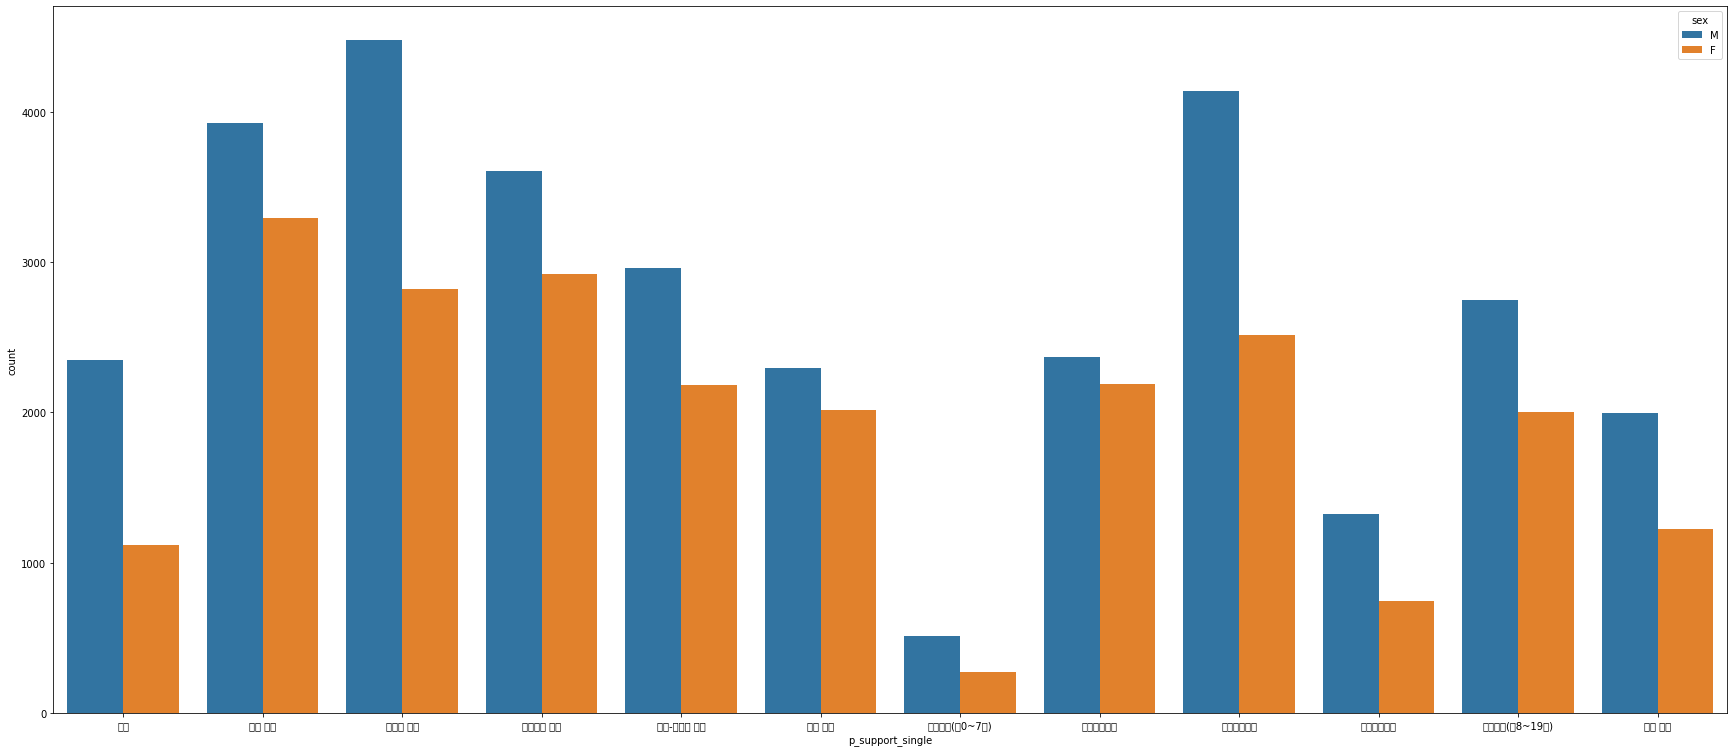

In [ ]:
# 성 別 support 카운트플랏

p_support = a_user['support'].str.split(',')
p_support  = p_support .apply(lambda x: pd.Series(x))
p_support.stack()
p_support.stack().reset_index(level=1, drop=True)
p_support  = p_support .stack().reset_index(level=1, drop=True).to_frame('p_support_single')
plot_user1 =  a_user.merge(p_support , left_index=True, right_index=True, how='left')


sns.countplot(x='p_support_single',hue='sex',data=plot_user1)
plt.gcf().set_size_inches(30, 13)

In [ ]:

group=plot_user1.groupby(["sex","p_support_single"])
print(group.size().reset_index(name='counts'))

   sex p_support_single  counts
0    F           개인금융지원    2513
1    F     교육지원(만8~19세)    2000
2    F           근로자 지원    2820
3    F           기업금융지원     742
4    F               기타    1114
5    F          문화생활 지원    2918
6    F      보육지원(만0~7세)     270
7    F           성인교육지원    2188
8    F            의료 지원    2016
9    F        주택-부동산 지원    2182
10   F            창업 지원    1220
11   F            취업 지원    3295
12   M           개인금융지원    4139
13   M     교육지원(만8~19세)    2746
14   M           근로자 지원    4477
15   M           기업금융지원    1322
16   M               기타    2346
17   M          문화생활 지원    3603
18   M      보육지원(만0~7세)     512
19   M           성인교육지원    2369
20   M            의료 지원    2292
21   M        주택-부동산 지원    2959
22   M            창업 지원    1994
23   M            취업 지원    3926


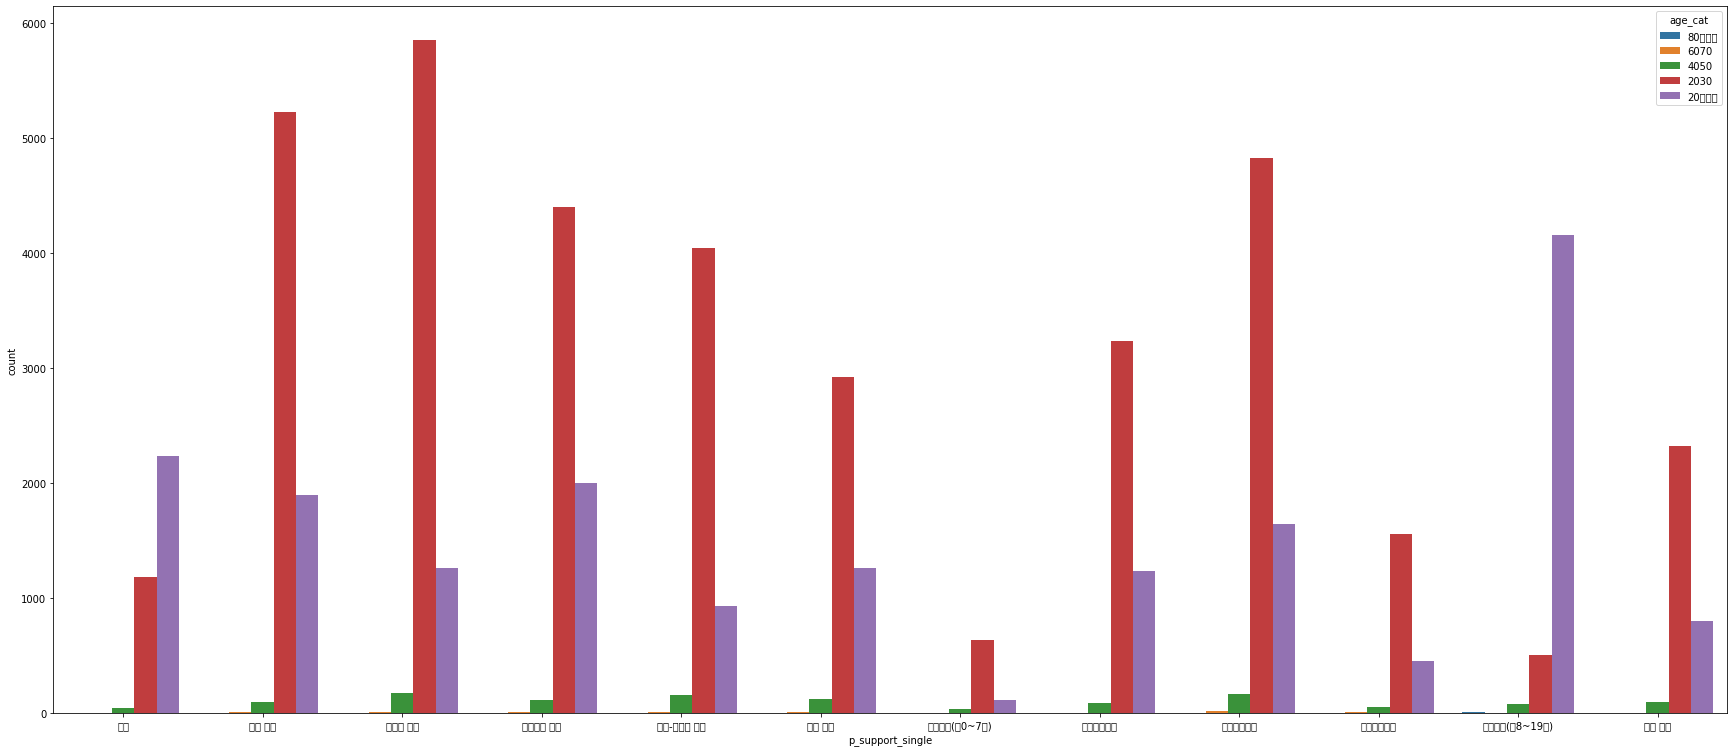

In [ ]:
# 나이 別 support 카운트플랏


sns.countplot(x='p_support_single',hue='age_cat', data=plot_user1)
plt.gcf().set_size_inches(30, 13)

In [ ]:

group2=plot_user1.groupby(["age_cat","p_support_single"])
print(group2.size().reset_index(name='counts'))

   age_cat p_support_single  counts
0     2030           개인금융지원    4829
1     2030     교육지원(만8~19세)     506
2     2030           근로자 지원    5852
3     2030           기업금융지원    1554
4     2030               기타    1182
5     2030          문화생활 지원    4398
6     2030      보육지원(만0~7세)     636
7     2030           성인교육지원    3234
8     2030            의료 지원    2919
9     2030        주택-부동산 지원    4042
10    2030            창업 지원    2322
11    2030            취업 지원    5224
12   20대이하           개인금융지원    1642
13   20대이하     교육지원(만8~19세)    4159
14   20대이하           근로자 지원    1261
15   20대이하           기업금융지원     450
16   20대이하               기타    2234
17   20대이하          문화생활 지원    2002
18   20대이하      보육지원(만0~7세)     114
19   20대이하           성인교육지원    1231
20   20대이하            의료 지원    1256
21   20대이하        주택-부동산 지원     928
22   20대이하            창업 지원     795
23   20대이하            취업 지원    1894
24    4050           개인금융지원     164
25    4050     교육지원(만8~19세)      75
26    4050           근로자 지원 

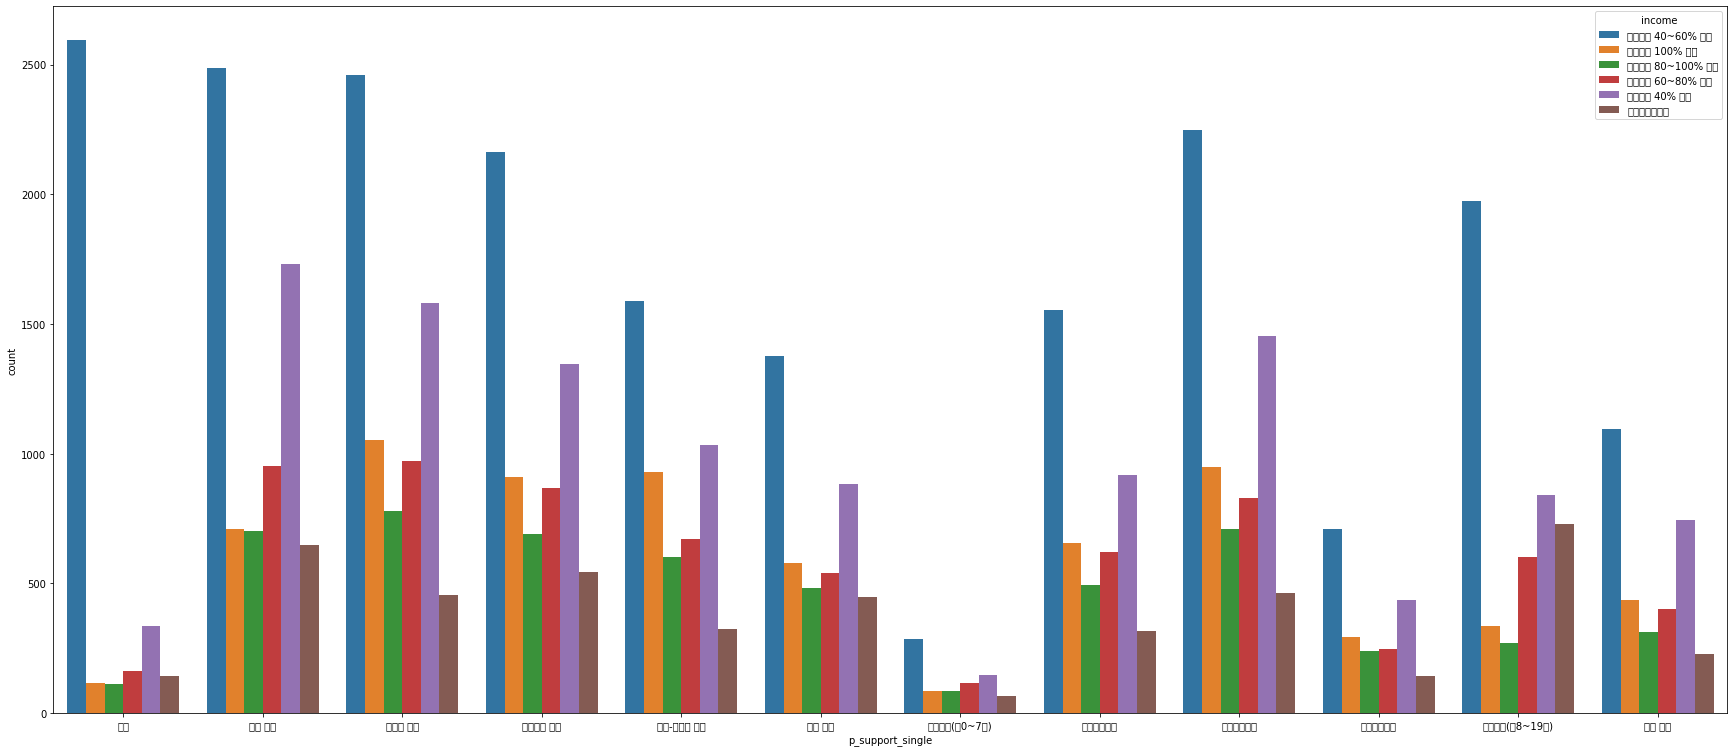

In [ ]:
# 소득 別 support 카운트플랏

sns.countplot(x='p_support_single',hue='income', data=plot_user1)
plt.gcf().set_size_inches(30, 13)

In [ ]:

group3=plot_user1.groupby(["income","p_support_single"])
print(group3.size().reset_index(name='counts').head(50))

            income p_support_single  counts
0          기초생활수급자           개인금융지원     463
1          기초생활수급자     교육지원(만8~19세)     730
2          기초생활수급자           근로자 지원     454
3          기초생활수급자           기업금융지원     143
4          기초생활수급자               기타     144
5          기초생활수급자          문화생활 지원     545
6          기초생활수급자      보육지원(만0~7세)      65
7          기초생활수급자           성인교육지원     317
8          기초생활수급자            의료 지원     447
9          기초생활수급자        주택-부동산 지원     324
10         기초생활수급자            창업 지원     229
11         기초생활수급자            취업 지원     647
12    중위소득 100% 이상           개인금융지원     948
13    중위소득 100% 이상     교육지원(만8~19세)     334
14    중위소득 100% 이상           근로자 지원    1051
15    중위소득 100% 이상           기업금융지원     291
16    중위소득 100% 이상               기타     115
17    중위소득 100% 이상          문화생활 지원     910
18    중위소득 100% 이상      보육지원(만0~7세)      86
19    중위소득 100% 이상           성인교육지원     656
20    중위소득 100% 이상            의료 지원     579
21    중위소득 100% 이상        주택-부동산

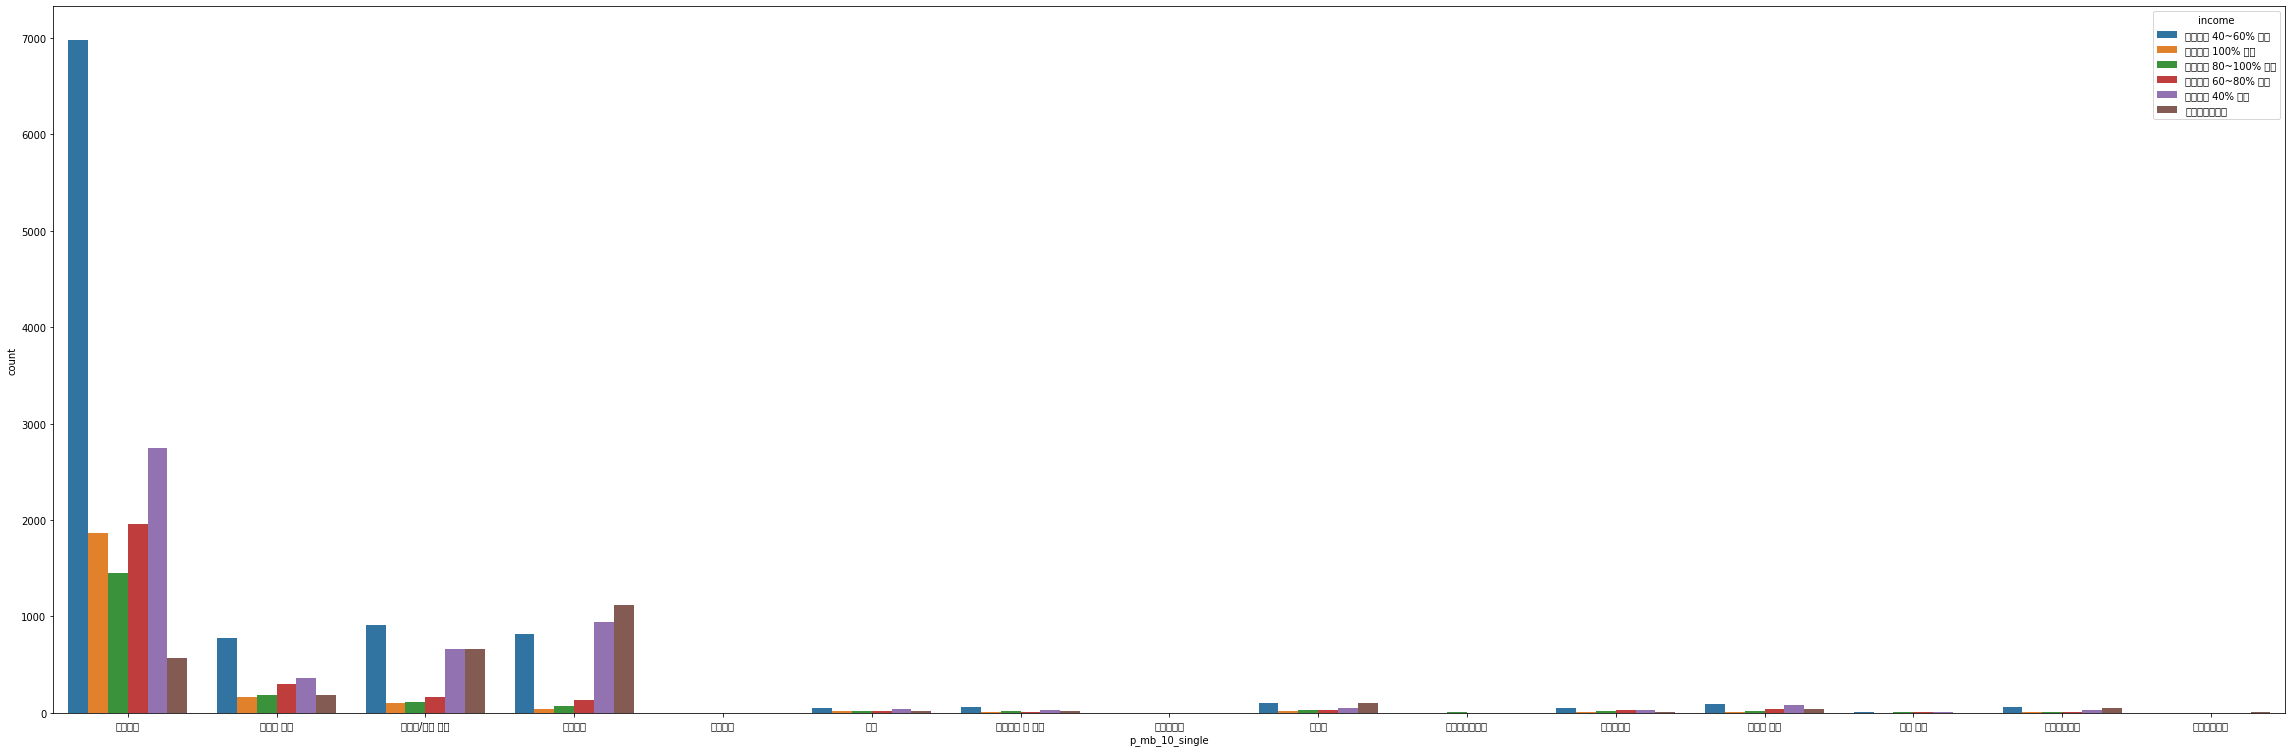

In [ ]:
# 소득 別 mb_10 카운트플랏

# mb_10 
p_mb_10 = a_user_1['mb_10'].str.split(',')
p_mb_10 = p_mb_10.apply(lambda x: pd.Series(x))
p_mb_10.stack()
p_mb_10.stack().reset_index(level=1, drop=True)
p_mb_10 = r_mb_10.stack().reset_index(level=1, drop=True).to_frame('p_mb_10_single')
plot_user_2 =  a_user.merge(p_mb_10, left_index=True, right_index=True, how='left')



sns.countplot(x='p_mb_10_single',hue='income', data=plot_user_2)
plt.gcf().set_size_inches(40, 13)

In [ ]:

group4=plot_user_2.groupby(["income","p_mb_10_single"])
print(group4.size().reset_index(name='counts').head(60))

            income p_mb_10_single  counts
0          기초생활수급자        구호구제대상자       3
1          기초생활수급자          농축수산인       7
2          기초생활수급자         다문화 가정      41
3          기초생활수급자         다자녀 가정     185
4          기초생활수급자           독거노인       2
5          기초생활수급자      보훈대상 및 가족      20
6          기초생활수급자         북한이탈주민       5
7          기초생활수급자         소년소녀가장      52
8          기초생활수급자          입양 가정       3
9          기초생활수급자            장애인     100
10         기초생활수급자           저소득층    1115
11         기초생활수급자          지체장애인       1
12         기초생활수급자      한부모/조손 가정     666
13         기초생활수급자           해당없음     573
14         기초생활수급자             환자      21
15    중위소득 100% 이상        구호구제대상자       2
16    중위소득 100% 이상          농축수산인       9
17    중위소득 100% 이상         다문화 가정      11
18    중위소득 100% 이상         다자녀 가정     165
19    중위소득 100% 이상           독거노인       1
20    중위소득 100% 이상      보훈대상 및 가족      12
21    중위소득 100% 이상         북한이탈주민       1
22    중위소득 100% 이상         소년소녀가장 

In [ ]:
# 나이,학력, 직업 상관관계
# # heatmap by plt.pcolor()

# relation1=r_user[['study','income','home_diff_is','age_cat']]
# import matplotlib.pyplot as plt

# plt.pcolor(relation1)
# plt.xticks(np.arange(0.5, len(relation1.columns), 1), relation1.columns)
# plt.yticks(np.arange(0.5, len(relation1.index), 1), relation1.index)
# plt.title('Heatmap by plt.pcolor()', fontsize=20)

# plt.colorbar()
# plt.show()